# <center>Income Evaluation Classification Project

## About The DataSet
The dataset you provided appears to be related to demographic and employment information. Here is the abbreviated view of the dataset:

    "age": Represents the age of the individual.
    "workclass": Indicates the type of work the individual is engaged in.
    "fnlwgt": Represents the final weight, which is a statistical weighting factor.
    "education": Denotes the highest level of education attained by the individual.
    "education-num": Represents the numerical representation of education.
    "marital-status": Indicates the marital status of the individual.
    "occupation": Represents the occupation of the individual.
    "relationship": Indicates the relationship status of the individual.
    "race": Denotes the race of the individual.
    "sex": Represents the gender of the individual.
    "capital-gain": Indicates the capital gains of the individual.
    "capital-loss": Represents the capital losses of the individual.
    "hours-per-week": Denotes the number of hours worked per week.
    "native-country": Represents the country of origin.
    "income": Indicates the income level of the individual, categorized as either "<=50K" or ">50K".

The dataset contains 32,561 rows and 15 columns. Each row represents an individual, and the columns provide information about their demographic attributes, education, employment, and income.

## importing libraries 

In [2]:
#Basic Analysis & Visualisation libaries
import pandas as pd 
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline


#Data Preprocessing & Splitig libraries

from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing  import StandardScaler,LabelEncoder

#Machine Learning Model evaluation libraries
#Machine Learning Alogorithms libararies


from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


## Loading dataset

In [3]:
df=pd.read_csv("income_evaluation.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Checking dataset informations

In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().mean()*100

age                0.0
 workclass         0.0
 fnlwgt            0.0
 education         0.0
 education-num     0.0
 marital-status    0.0
 occupation        0.0
 relationship      0.0
 race              0.0
 sex               0.0
 capital-gain      0.0
 capital-loss      0.0
 hours-per-week    0.0
 native-country    0.0
 income            0.0
dtype: float64

In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1    workclass       32537 non-null  object
 2    fnlwgt          32537 non-null  int64 
 3    education       32537 non-null  object
 4    education-num   32537 non-null  int64 
 5    marital-status  32537 non-null  object
 6    occupation      32537 non-null  object
 7    relationship    32537 non-null  object
 8    race            32537 non-null  object
 9    sex             32537 non-null  object
 10   capital-gain    32537 non-null  int64 
 11   capital-loss    32537 non-null  int64 
 12   hours-per-week  32537 non-null  int64 
 13   native-country  32537 non-null  object
 14   income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


## statistical properties of dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [11]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### <center><strong><i> changing the columns names

In [12]:
colname=['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income']
df.columns = colname
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [13]:
colnames=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       ' marital_status', 'occupation', 'relationship', 'race', 'sex',
       ' capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'
         ]
df.columns=colnames
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       ' marital_status', 'occupation', 'relationship', 'race', 'sex',
       ' capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [14]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### exploratory data analysis

### <i> bar chart


<Axes: >

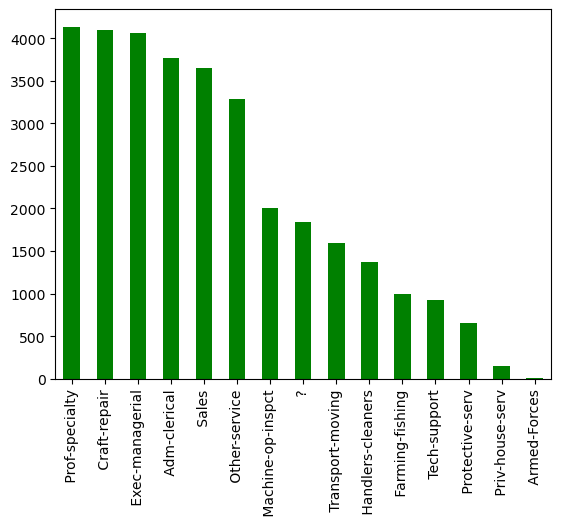

In [15]:
df['occupation'].value_counts().plot(kind="bar",color='green')

<Axes: >

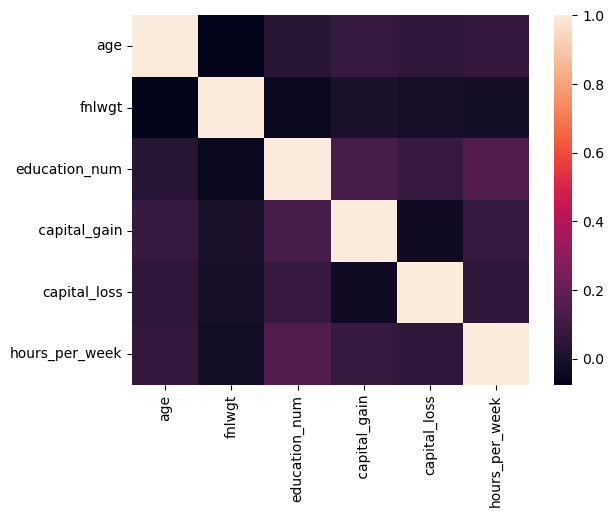

In [16]:
sns.heatmap(df.corr())

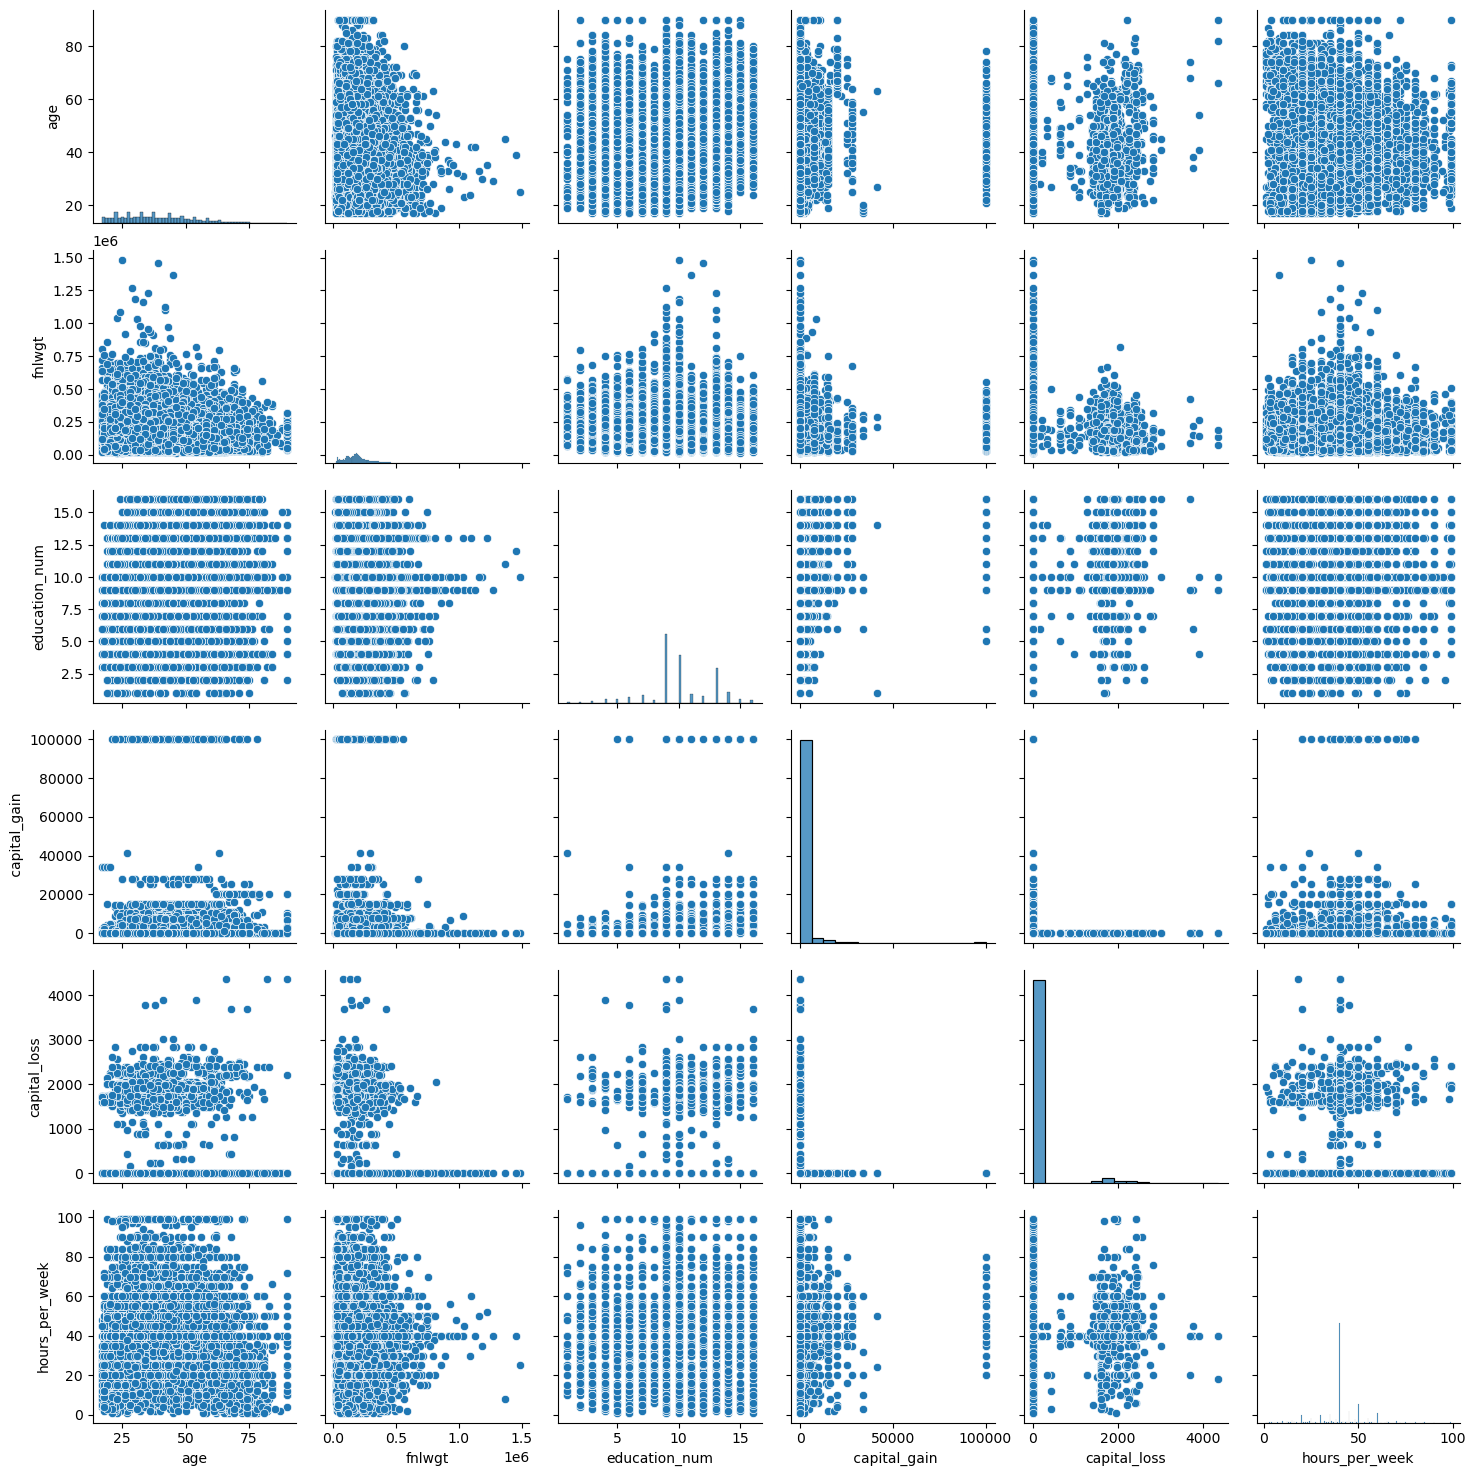

In [18]:
sns.pairplot(data=df)
plt.show()

### here we  see  that many unwant symbols and space in the column of the dataset in the following step removing the unwanted characters 

In [16]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df['workclass']=df['workclass'].replace("?",np.nan)

In [18]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education_num      0
 marital_status    0
occupation         0
relationship       0
race               0
sex                0
 capital_gain      0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

#### inthis we can see that 9 columns are categorical values and 6 columns are numerical values
#### converting the categorical into numerical

In [20]:
le= LabelEncoder()

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       ' marital_status', 'occupation', 'relationship', 'race', 'sex',
       ' capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [22]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       ' marital_status', 'occupation', 'relationship', 'race', 'sex',
       ' capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']
df[cols]=df[cols].apply(le.fit_transform)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32537 non-null  int64
 1   workclass        32537 non-null  int32
 2   fnlwgt           32537 non-null  int64
 3   education        32537 non-null  int32
 4   education_num    32537 non-null  int64
 5    marital_status  32537 non-null  int32
 6   occupation       32537 non-null  int32
 7   relationship     32537 non-null  int32
 8   race             32537 non-null  int32
 9   sex              32537 non-null  int32
 10   capital_gain    32537 non-null  int64
 11  capital_loss     32537 non-null  int64
 12  hours_per_week   32537 non-null  int64
 13  native_country   32537 non-null  int32
 14  income           32537 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


### feature extraction or feature selection.
Feature extraction involves selecting and extracting relevant features from the input data that are expected to have a significant impact on the target variable. This process helps reduce the dimensionality of the data and focuses on the most informative features

In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

### feature scaling
Feature scaling is a common preprocessing step in machine learning that aims to standardize the range and distribution of the input features. It helps ensure that all features are on a similar scale, which can be beneficial for certain machine learning algorithms.

In [25]:
sc=StandardScaler()

In [26]:
x=sc.fit_transform(x)

### data splitting
Data splitting is a common practice in machine learning to evaluate the performance of a model. It involves dividing the available dataset into two or more subsets: one for training the model and another for testing or evaluating its performance.

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [29]:

for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
    print("*"*60)


model trained with LogisticRegression
Model accuracy on train is::  0.8289534347625634
Model accuracy on test is::  0.8220514790626201
confusion_matrix train is::  [[4662  290]
 [ 823  732]]
confusion_matrix test is::  [[18525  1221]
 [ 3411  2873]]
Wrong Predictions made: 4632 / 26030
************************************************************
model trained with GradientBoostingClassifier
Model accuracy on train is::  0.8850468725987398
Model accuracy on test is::  0.8647330003841721
confusion_matrix train is::  [[4758  194]
 [ 554 1001]]
confusion_matrix test is::  [[18703  1043]
 [ 2478  3806]]
Wrong Predictions made: 3521 / 26030
************************************************************
model trained with AdaBoostClassifier
Model accuracy on train is::  0.8610726909482096
Model accuracy on test is::  0.8595466769112562
confusion_matrix train is::  [[4691  261]
 [ 643  912]]
confusion_matrix test is::  [[18692  1054]
 [ 2602  3682]]
Wrong Predictions made: 3656 / 26030
*********

## ROC curve analysis or Receiver Operating Characteristic curve analysis in machine learning.

#### ROC curve analysis is a technique used to evaluate the performance of a binary classification model. It plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. The ROC curve provides a visual representation of the trade-off between the model's sensitivity (TPR) and specificity (1 - FPR) for different classification thresholds.

Model used is::  LogisticRegression()


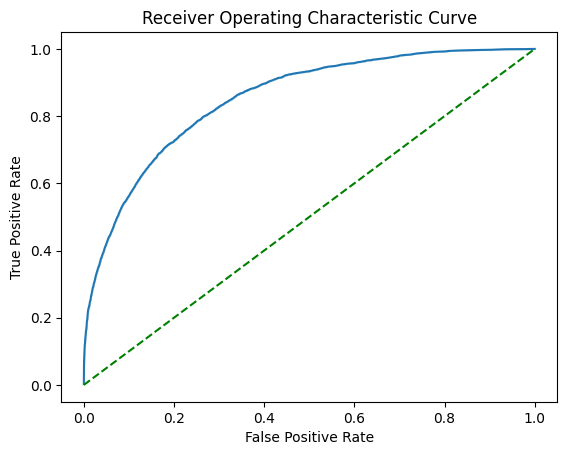

Model used is::  GradientBoostingClassifier()


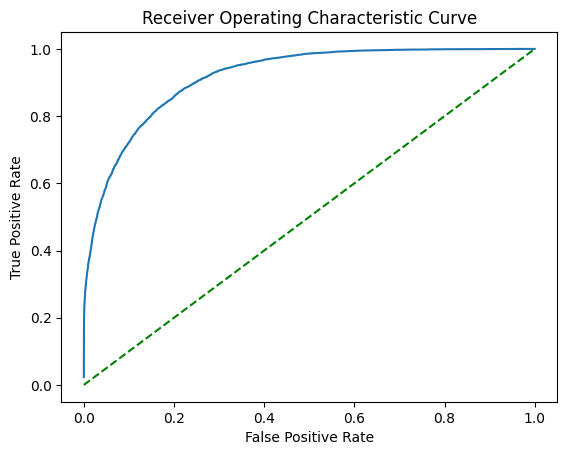

Model used is::  AdaBoostClassifier()


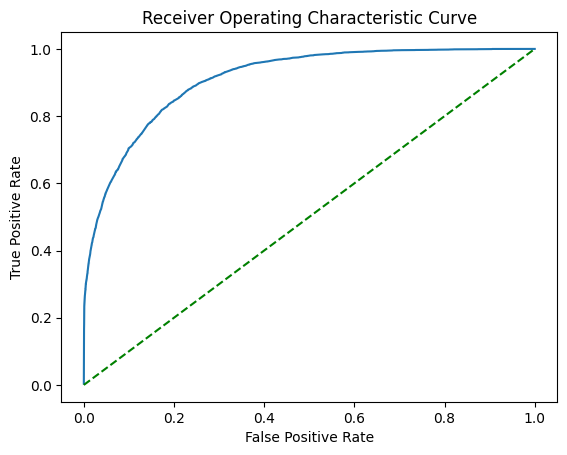

Model used is::  KNeighborsClassifier()


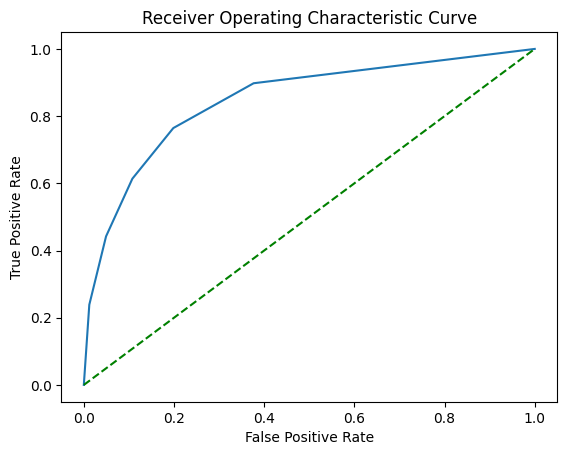

In [30]:
for name, model in models.items():
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("Model used is:: ",model)
    sns.lineplot(x= fpr, y=tpr)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.show()

# conclusion:
By visualizing the ROC curve for different models, you can compare their performance and select the model with the highest AUC, indicating better classification performance